In the previous notebook, we developed a function to generate atom maps for a given `bcs.Cluster` object. These atom maps tell us how the atoms within acyl-CoA substrates are transformed and by which module as these acyl-CoA units move down an assembly line. Here, we have added the atom mapping function developed previously as a formal method within the `bcs.Cluster` class and will go through a couple more examples to visualize these atom maps.

In [1]:
from retrotide import retrotide, structureDB

























































































































["AT{'substrate': 'allylmal'}", "KR{'type': 'B1'}", 'loading: False']
["AT{'substrate': 'hexmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']
["AT{'substrate': 'D-isobutmal'}", 'loading: False']
["AT{'substrate': 'DCP'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']
["AT{'substrate': 'emal'}", 'loading: False']
["AT{'substrate': 'isobutmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']
["AT{'substrate': 'DCP'}", "KR{'type': 'C1'}", 'loading: False']
["AT{'substrate': 'hmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']
["AT{'substrate': 'hmal'}", "KR{'type': 'B1'}", 'loading: False']
["AT{'substrate': 'D-isobutmal'}", "KR{'type': 'B1'}", 'loading: False']
["AT{'substrate': 'emal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']


[18:06:56] product atom-mapping number 10 not found in reactants.
[18:06:56] product atom-mapping number 10 not found in reactants.
[18:06:56] product atom-mapping number 10 not found in reactants.
[18:06:56] product atom-mapping number 10 not found in reactants.
[18:06:56] product atom-mapping number 10 not found in reactants.
[18:06:56] product atom-mapping number 10 not found in reactants.
[18:06:56] product atom-mapping number 10 not found in reactants.
[18:06:56] product atom-mapping number 10 not found in reactants.
[18:06:56] product atom-mapping number 10 not found in reactants.
[18:06:56] product atom-mapping number 10 not found in reactants.
[18:06:56] product atom-mapping number 10 not found in reactants.


In [2]:
import bcs

In [3]:
from rdkit import Chem
from rdkit.Chem import rdFMCS, Draw
from typing import List

In [4]:
loading_AT_domain = bcs.AT(active = True, substrate = "Acetyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: loading_AT_domain}, loading = True)

AT_domain_mod1 = bcs.AT(active = True, substrate = "Malonyl-CoA")
module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1}, loading = False)

AT_domain_mod2 = bcs.AT(active = True, substrate = "Malonyl-CoA")
module2 = bcs.Module(domains = {bcs.AT: AT_domain_mod2}, loading = False)

AT_domain_mod3 = bcs.AT(active = True, substrate = "Malonyl-CoA")
module3 = bcs.Module(domains = {bcs.AT: AT_domain_mod3}, loading = False)

cluster = bcs.Cluster(modules = [loading_module, module1, module2, module3])

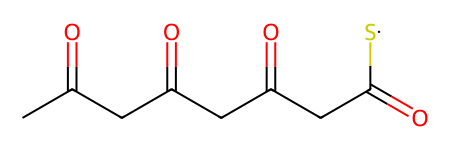

In [5]:
cluster.computeProduct(structureDB)

In [6]:
atom_mapped_mols_list = cluster.get_atom_mapping(structureDB)

The method `.visualize_atom_maps` has also been added to the `bcs.Cluster` class so we can now call upon this method to visualize how the atoms in this PKS are transformed across all modules:

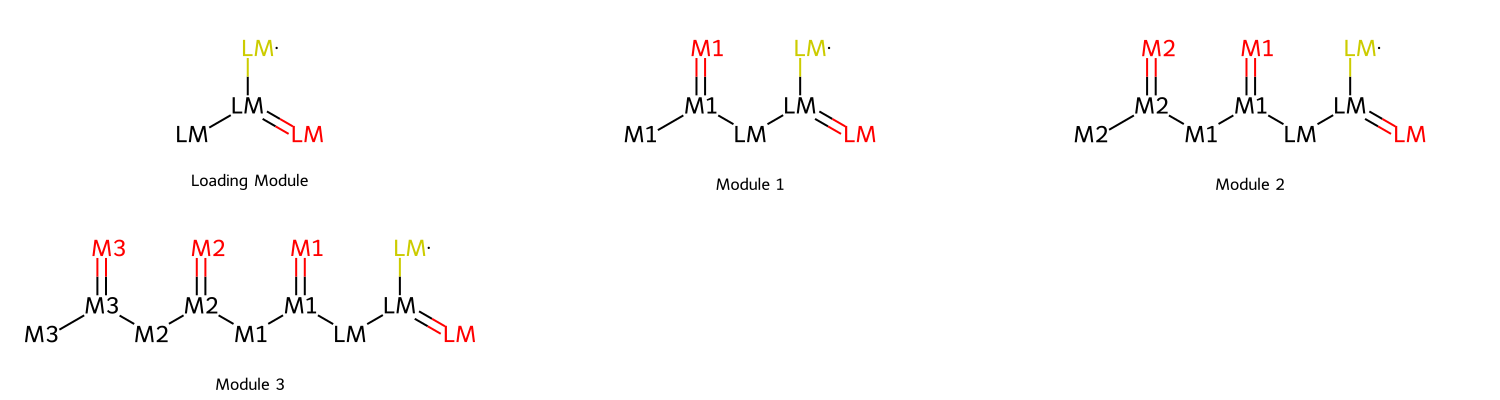

In [7]:
cluster.visualize_atom_maps(atom_mapped_mols_list)

#### Reproducing PKS designs from the Biosynth Pipeline paper

**1. 4-Hydroxybutyric acid**

In [8]:
### Loading module begins with hydroxymalonyl-CoA
loading_AT_domain = bcs.AT(active = True, substrate = "Hydroxymalonyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: loading_AT_domain}, loading = True)

### First extension module adds malonyl-CoA and features a fully-reducing loop
AT_domain_mod1 = bcs.AT(active = True, substrate = "Malonyl-CoA")
KR_domain_mod1 = bcs.KR(active = True, type = "B")
DH_domain_mod1 = bcs.DH(active = True)
ER_domain_mod1 = bcs.ER(active = True)

module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1,
                                bcs.KR: KR_domain_mod1,
                                bcs.DH: DH_domain_mod1,
                                bcs.ER: ER_domain_mod1}, loading = False)

cluster = bcs.Cluster(modules = [loading_module, module1])

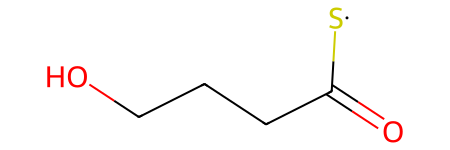

In [9]:
cluster.computeProduct(structureDB)

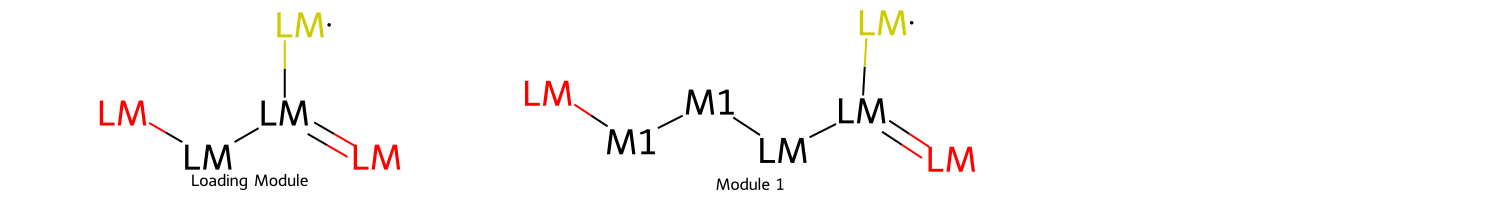

In [10]:
atom_mapped_mols_list = cluster.get_atom_mapping(structureDB)
cluster.visualize_atom_maps(atom_mapped_mols_list)

**2. 5-Ketohexanoic acid**

In [11]:
### Loading module begins with mkalonyl-CoA
loading_AT_domain = bcs.AT(active = True, substrate = "Malonyl-CoA")

loading_module = bcs.Module(domains = {bcs.AT: loading_AT_domain}, loading = True)

### First extension module adds malonyl-CoA
AT_domain_mod1 = bcs.AT(active = True, substrate = "Malonyl-CoA")

module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1}, loading = False)

### Second extension module adds malonyl-CoA and features a fully-reducing loop
AT_domain_mod2 = bcs.AT(active = True, substrate = "Malonyl-CoA")
KR_domain_mod2 = bcs.KR(active = True, type = "B")
DH_domain_mod2 = bcs.DH(active = True)
ER_domain_mod2 = bcs.ER(active = True)

module2 = bcs.Module(domains = {bcs.AT: AT_domain_mod2,
                                bcs.KR: KR_domain_mod2,
                                bcs.DH: DH_domain_mod2,
                                bcs.ER: ER_domain_mod2}, loading = False)

cluster = bcs.Cluster(modules = [loading_module, module1, module2])

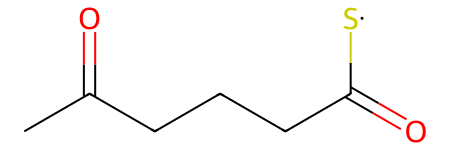

In [12]:
cluster.computeProduct(structureDB)

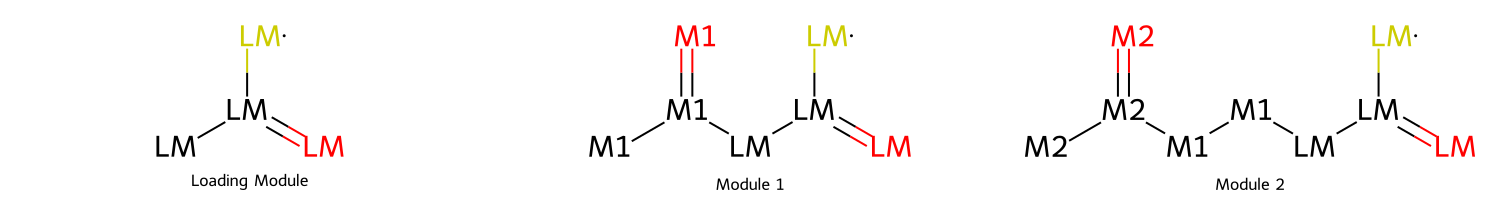

In [13]:
atom_mapped_mols_list = cluster.get_atom_mapping(structureDB)
cluster.visualize_atom_maps(atom_mapped_mols_list)

**3. Cryptofolione**

In [14]:
### Create a loading module with cinnamoyl-CoA
AT_domain_with_cinnamoyl_CoA = bcs.AT(active = True, substrate = "cin")

loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_cinnamoyl_CoA}, 
                            loading = True)

### Create the first extension module with malonyl-CoA and a KR domain
AT_domain_mod1 = bcs.AT(active = True, substrate = "Malonyl-CoA") 
KR_domain_mod1 = bcs.KR(active = True, type = "B")

module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1,
                                bcs.KR: KR_domain_mod1}, loading = False)

### Create the second extension module with malonyl-CoA and a KR domain
AT_domain_mod2 = bcs.AT(active = True, substrate = "Malonyl-CoA") 
KR_domain_mod2 = bcs.KR(active = True, type = "B")

module2 = bcs.Module(domains = {bcs.AT: AT_domain_mod2,
                                bcs.KR: KR_domain_mod2}, loading = False)

### Create the third extension module with malonyl-CoA and DH, KR domains
AT_domain_mod3 = bcs.AT(active = True, substrate = "Malonyl-CoA")
KR_domain_mod3 = bcs.KR(active = True, type = "B")
DH_domain_mod3 = bcs.DH(active = True)

module3 = bcs.Module(domains = {bcs.AT: AT_domain_mod3,
                                bcs.KR: KR_domain_mod3,
                                bcs.DH: DH_domain_mod3,}, loading = False)

### Create the fourth extension module with malonyl-CoA and a KR domain
AT_domain_mod4 = bcs.AT(active = True, substrate = "Malonyl-CoA")
KR_domain_mod4 = bcs.KR(active = True, type = "B")

module4 = bcs.Module(domains = {bcs.AT: AT_domain_mod4,
                                bcs.KR: KR_domain_mod4}, loading = False)

### Create the fifth and final extension module with malonyl-CoA and KR, DH domains
AT_domain_mod5 = bcs.AT(active = True, substrate = "Malonyl-CoA")
KR_domain_mod5 = bcs.KR(active = True, type = "B")
DH_domain_mod5 = bcs.DH(active = True)

module5 = bcs.Module(domains = {bcs.AT: AT_domain_mod5,
                                bcs.KR: KR_domain_mod5,
                                bcs.DH: DH_domain_mod5}, loading = False)

cluster = bcs.Cluster(modules = [loading_module,
                                 module1,
                                 module2,
                                 module3,
                                 module4,
                                 module5])

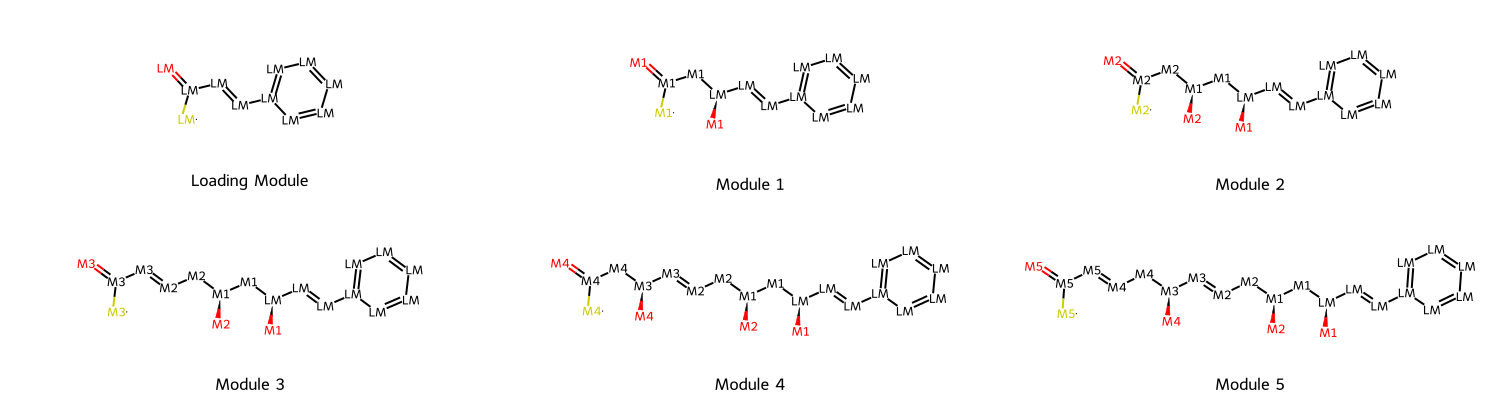

In [15]:
atom_mapped_mols_list = cluster.get_atom_mapping(structureDB)
cluster.visualize_atom_maps(atom_mapped_mols_list)